         clicks  impressions  installs     spend  conversion
country                                                     
GN           14          161         1  0.340002    8.695652
GM            2           23         1  0.100004    8.695652
TM            3           41         0  0.140000    7.317073
GQ            2           31         1  0.130000    6.451613
TO            5           78         0  0.260000    6.410256
...         ...          ...       ...       ...         ...
ER            0            3         0  0.010000    0.000000
FK            0           37         0  0.150000    0.000000
PM            0           98         0  0.400027    0.000000
FM            0           21         0  0.090000    0.000000
KM            0           54         0  0.150000    0.000000

[223 rows x 5 columns]


<AxesSubplot:xlabel='country'>

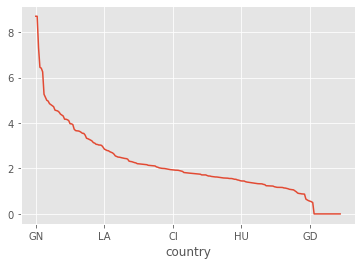

In [284]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

payments = pd.read_csv('payments.csv')
spent = pd.read_csv('spent.csv')

# убираем значения inf
spent = spent.replace(np.inf, 0)

# сводная по стране
spent_pivot = spent.pivot_table(index='country', values=spent[1:-1], aggfunc='sum')

# конверсия на втором шаге 
spent_pivot['conversion'] = spent_pivot['clicks'].div(spent_pivot.impressions).mul(100)

spent_pivot = spent_pivot.sort_values('conversion', ascending=False)
# убрать нулевые значения
# spent_pivot = spent_pivot.loc[spent_pivot.clicks !=0].sort_values('conversion', ascending=False)


# убрать большое значение
spent_pivot = spent_pivot[spent_pivot.index.get_level_values('country') != 'TV']



# сортировка на положительные и отрицательные значения 
# spent_pivot['q'] = np.where(spent_pivot.conversion < 5, 'bad', 'good' )
# conv_good = spent_pivot[spent_pivot['q'] == 'good'].count()
# conv_bad = spent_pivot[spent_pivot['q'] == 'bad'].count()
print(spent_pivot)

matplotlib.style.use('ggplot')
spent_pivot.set_index(spent_pivot.index.get_level_values('country'))['conversion'].plot()

         clicks  impressions  installs     spend  conversion
country                                                     
MO            1          200         1  1.620055       100.0
LS            1           16         1  0.080000       100.0
BI            1           41         1  0.170000       100.0
SX            1          153         1  0.550000       100.0
GD            1          178         1  0.469996       100.0
...         ...          ...       ...       ...         ...
ER            0            3         0  0.010000         0.0
FK            0           37         0  0.150000         0.0
PM            0           98         0  0.400027         0.0
FM            0           21         0  0.090000         0.0
KM            0           54         0  0.150000         0.0

[223 rows x 5 columns]


<AxesSubplot:xlabel='country'>

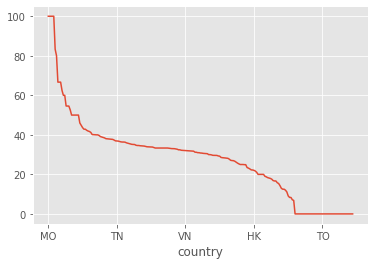

In [286]:

# конверсия на третьем шаге 
spent_pivot['conversion'] = spent_pivot['installs'].div(spent_pivot.clicks).mul(100)
spent_pivot = spent_pivot.sort_values('conversion', ascending=False)
spent_pivot = spent_pivot.replace(np.NAN, 0)
print(spent_pivot)
matplotlib.style.use('ggplot')
spent_pivot.set_index(spent_pivot.index.get_level_values('country'))['conversion'].plot()

         app_revenue  purchases  unique_purchases  conversion       abc  \
country                                                                   
BM          19.90000         10                10  100.000000  3.372394   
BA         184.81355         52                52  100.000000  3.372394   
CR          58.39028         26                26  100.000000  3.372394   
DO          31.92000         28                28  100.000000  3.372394   
MQ          29.92572         27                27  100.000000  3.372394   
GH          38.14052         22                22  100.000000  3.372394   
SV          72.30000         48                48  100.000000  3.372394   
PE          39.38180         36                36  100.000000  3.372394   
PK          64.09179         21                21  100.000000  3.372394   
HN         146.71000         55                55  100.000000  3.372394   
RS         101.79340         57                42   73.684211  2.484922   
AR        1094.08000     

<AxesSubplot:xlabel='country'>

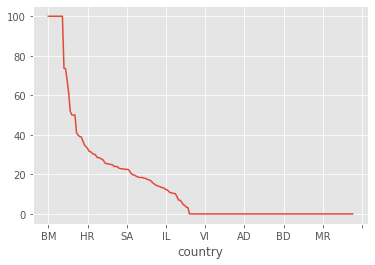

In [295]:
# сводная по стране
payments_pivot = payments.pivot_table(index='country', values=payments[3:-1], aggfunc='sum')

# конверсия на четвёртом шаге
payments_pivot['conversion'] = payments_pivot['unique_purchases'].div(payments_pivot.purchases).mul(100)
payments_pivot = payments_pivot.replace(np.NaN, 0)
payments_pivot = payments_pivot.sort_values('conversion', ascending=False)

# АВС анализ
# Находим долю каждой конверсии
payments_pivot['abc'] = payments_pivot.groupby('country').conversion.transform('sum')/payments_pivot.conversion.sum()*100
# Поиск накопления
payments_pivot["abc_cum"] = payments_pivot["abc"].cumsum()
# Сегмент группы А
payments_pivot_A = payments_pivot.drop(payments_pivot[payments_pivot['abc_cum'] >= 40].index)
# Сегмент группы В
payments_pivot_B = payments_pivot.loc[(payments_pivot['abc_cum'] > 40) & (payments_pivot['abc_cum'] < 90)]
# Сегмент группы С
payments_pivot_C = payments_pivot.drop(payments_pivot[payments_pivot['abc_cum'] <= 90].index)

print(payments_pivot_A)


matplotlib.style.use('ggplot')
payments_pivot.set_index(payments_pivot.index.get_level_values('country'))['conversion'].plot()